# Log Evalution
Evaluation of the data gathered from the logs
### Keys
- Priorty (The priority level assigned by the producer) the level includes: low, medium and high
- Partition: Is the unit execution
- SentTime: The timestamp from the producer when the message was sent.
- ReceivedTime: The timestamp from the consumer when the message was recieved.
- TimeSpent: The difference between teh ReceivedTime and SentTime in milliseconds
- PayloadSize: The size in byte of the payload sent from the producer to the consumer.


#### Uploading and reading the log file

In [1]:
from google.colab import files
uploaded = files.upload()

Saving logs_10_1.csv to logs_10_1.csv


In [2]:
# Input the file uploaded file into the uploaded key e.g uploaded['logs.csv']
import pandas as pd
import io
df = pd.read_csv(io.StringIO(uploaded['logs_10_1.csv'].decode('utf-8')))
df.head()

,Priority,Partition,SentTime,ReceivedTime,TimeSpent,PayloadSize
0,default,15,2024-03-15 15:22:24.512 +0000 GMT,2024-03-15 15:22:24.520941 +0000 GMT m=+13959....,8,83
1,default,15,2024-03-15 15:22:24.512 +0000 GMT,2024-03-15 15:22:24.521251 +0000 GMT m=+13959....,9,83
2,default,15,2024-03-15 15:22:24.512 +0000 GMT,2024-03-15 15:22:24.521597 +0000 GMT m=+13959....,9,83
3,default,15,2024-03-15 15:22:24.512 +0000 GMT,2024-03-15 15:22:24.521691 +0000 GMT m=+13959....,9,83
4,default,15,2024-03-15 15:22:24.512 +0000 GMT,2024-03-15 15:22:24.521791 +0000 GMT m=+13959....,9,83


Data distribution


In [3]:
min = df['TimeSpent'].min()
print('Min Time Spent=%.3f' % ( min))

max = df['TimeSpent'].max()
print('Max Time Spent=%.3f' % ( max))

mean = df['TimeSpent'].mean()
print('Mean Time Spent=%.3f' % ( mean ))

median = df['TimeSpent'].median()
print('Median Time Spent=%.3f' % ( median ))

std = df['TimeSpent'].std()
print('Std Time Spent=%.3f' % ( std ))

var_high = df[df['Priority'] == 'high']['TimeSpent']
var_medium = df[df['Priority'] == 'medium']['TimeSpent']
var_low = df[df['Priority'] == 'low']['TimeSpent']
var_default = df[df['Priority'] == 'default']['TimeSpent']
print("=========================== COUNT ===========================")
print('Total High =%.3f' % ( var_high.count()))
print('Total Medium =%.3f' % ( var_medium.count()))
print('Total Low =%.3f' % ( var_low.count()))
print('Total Default =%.3f' % ( var_default.count()))
print("=========================== MIN ===========================")
print('Total High =%.3f' % ( var_high.min()))
print('Total Medium =%.3f' % ( var_medium.min()))
print('Total Low =%.3f' % ( var_low.min()))
print('Total Default =%.3f' % ( var_default.min()))
print("=========================== MAX ===========================")
print('Total High =%.3f' % ( var_high.max()))
print('Total Medium =%.3f' % ( var_medium.max()))
print('Total Low =%.3f' % ( var_low.max()))
print('Total Default =%.3f' % ( var_default.max()))

print("=========================== Group ===========================")
g_high_low_medium = df[df['Priority'].isin(['high', 'low', 'medium'])]['TimeSpent']
print('Total Group Mean =%.3f' % ( g_high_low_medium.mean()))
print('Total Group Median =%.3f' % ( g_high_low_medium.median()))
print('Total Group STD =%.3f' % ( g_high_low_medium.std()))


Min Time Spent=7.000
Max Time Spent=11.000
Mean Time Spent=8.728
Median Time Spent=9.000
Std Time Spent=0.879
=========================== COUNT ===========================
Total High =100.000
Total Medium =100.000
Total Low =100.000
Total Default =300.000
=========================== MIN ===========================
Total High =7.000
Total Medium =7.000
Total Low =7.000
Total Default =7.000
=========================== MAX ===========================
Total High =10.000
Total Medium =10.000
Total Low =10.000
Total Default =11.000
=========================== Group ===========================
Total Group Mean =8.433
Total Group Median =8.000
Total Group STD =0.735


**Mean Distrubtion**

In [4]:
mean_distribution = df.groupby('Priority')['TimeSpent'].mean()
print(mean_distribution)
overall_mean = df['TimeSpent'].mean()

Priority
default    9.023333
high       8.360000
low        8.570000
medium     8.370000
Name: TimeSpent, dtype: float64


**Median**


In [5]:
median_distribution = df.groupby('Priority')['TimeSpent'].median()
print(median_distribution)
overall_mean = df['TimeSpent'].median()

Priority
default    9.0
high       8.0
low        9.0
medium     8.0
Name: TimeSpent, dtype: float64


**Standard Deviation**

In [6]:
std_distribution = df.groupby(['Priority'])['TimeSpent'].std()
print(std_distribution)

Priority
default    0.912266
high       0.689312
low        0.768772
medium     0.733815
Name: TimeSpent, dtype: float64


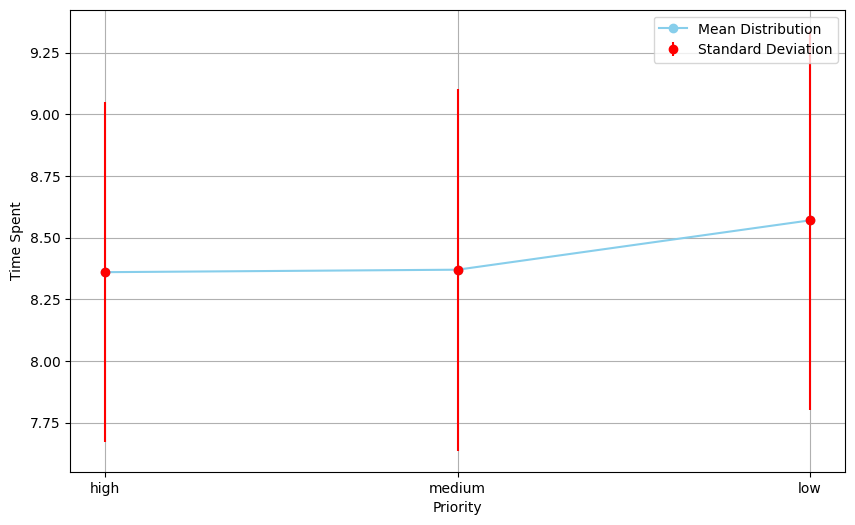

In [7]:
import matplotlib.pyplot as plt

# Distribution values
mean_distribution_values = [var_high.mean(), var_medium.mean(), var_low.mean()]
std_distribution_values = [var_high.std(), var_medium.std(), var_low.std()]

priority_labels = ['high', 'medium', 'low']

# Plotting the line plot
plt.figure(figsize=(10, 6))

# Plotting the mean distribution
plt.plot(priority_labels, mean_distribution_values, marker='o', color='skyblue', label='Mean Distribution')

# Add error bars
plt.errorbar(priority_labels, mean_distribution_values, yerr=std_distribution_values, fmt='o', color="red", label="Standard Deviation")

# Adding labels and title
plt.xlabel('Priority')
plt.ylabel('Time Spent')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

**Mann-Whitney U Test**

In [26]:
from scipy.stats import mannwhitneyu


default = df[df['Priority'] == 'default']['TimeSpent']
high = df[df['Priority'] == 'high']['TimeSpent']
medium = df[df['Priority'] == 'medium']['TimeSpent']
low = df[df['Priority'] == 'low']['TimeSpent']

stat1, p1 = mannwhitneyu(high, default)
print('High and Default Statistics=%.3f, p=%.3f' % (stat1, p1))

stat2, p2 = mannwhitneyu(medium, default)
print('Medium and Default Statistics=%.3f, p=%.3f' % (stat2, p2))

stat3, p3 = mannwhitneyu(low, default)
print('Low and Default Statistics=%.3f, p=%.3f' % (stat3, p3))


group_high_low_medium = df[df['Priority'].isin(['high', 'low', 'medium'])]['TimeSpent']
group_default = df[df['Priority'] == 'default']['TimeSpent']

stat, p = mannwhitneyu(group_high_low_medium, group_default)

print('Mann-Whitney U statistic = %.3f, p = %.3f' % (stat, p))


High and Default Statistics=9129.000, p=0.000
Medium and Default Statistics=9111.500, p=0.000
Low and Default Statistics=11032.000, p=0.000
Mann-Whitney U statistic = 29272.500, p = 0.000


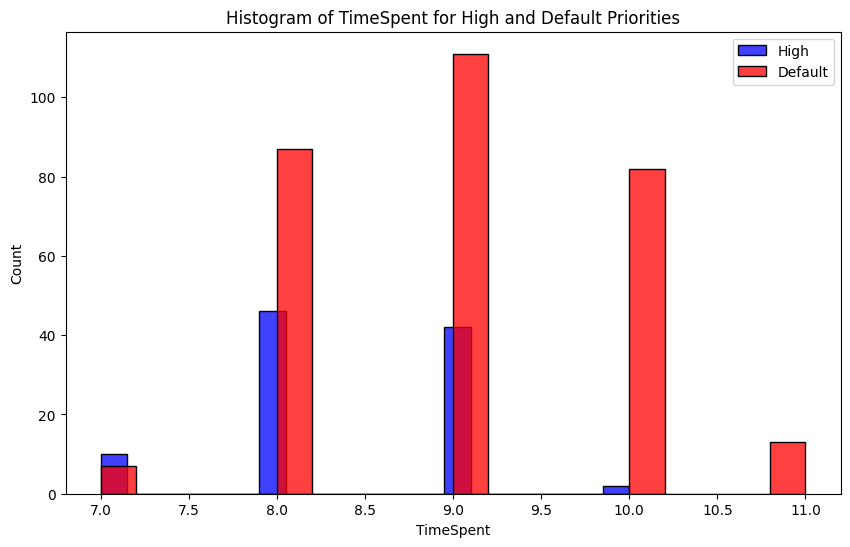

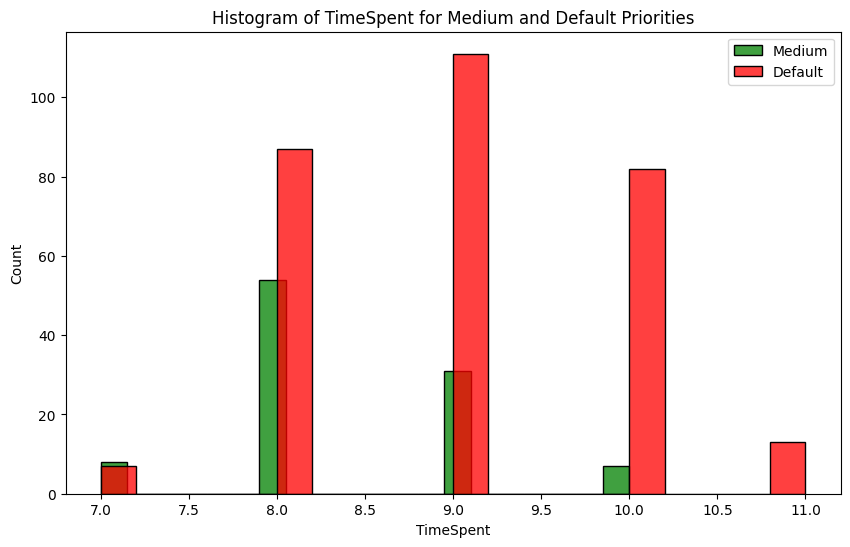

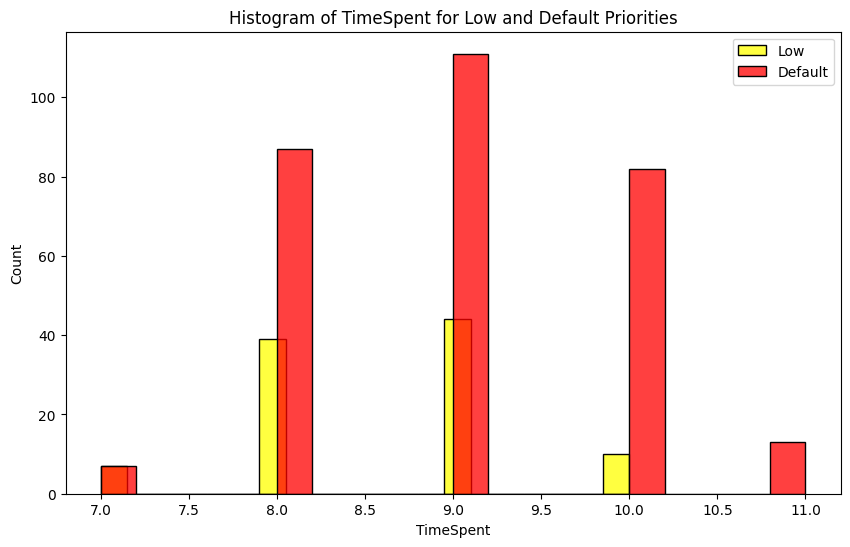

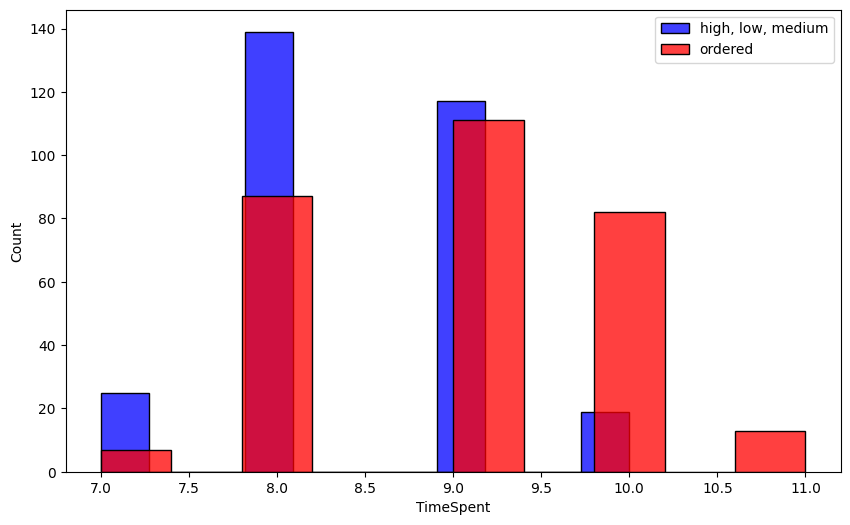

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


# High with default
plt.figure(figsize=(10, 6))
sns.histplot(high, color='blue',  label='High', bins=20)
sns.histplot(default, color='red', label='Default', bins=20)
plt.xlabel('TimeSpent')
plt.title('Histogram of TimeSpent for High and Default Priorities')
plt.legend()
plt.show()

# Medium with default
plt.figure(figsize=(10, 6))
sns.histplot(medium, color='green',  label='Medium', bins=20)
sns.histplot(default, color='red',  label='Default', bins=20)
plt.xlabel('TimeSpent')
plt.title('Histogram of TimeSpent for Medium and Default Priorities')
plt.legend()
plt.show()

# High with default
plt.figure(figsize=(10, 6))
sns.histplot(low, color='yellow', label='Low', bins=20)
sns.histplot(default, color='red', label='Default', bins=20)
plt.xlabel('TimeSpent')
plt.title('Histogram of TimeSpent for Low and Default Priorities')
plt.legend()
plt.show()

#group_high_low_medium and group_default are your two groups
plt.figure(figsize=(10, 6))
sns.histplot(group_high_low_medium, color='blue', label='high, low, medium')
sns.histplot(default, color='red',  label='ordered')
plt.xlabel('TimeSpent')
plt.legend()
plt.show()